In [1]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.util import montage
import numpy as np

In [2]:
# Load metadata
metadata = pd.read_csv("metadata.csv")
print("Metadata loaded successfully! First 5 entries:")
display(metadata.head())

Metadata loaded successfully! First 5 entries:


,class_id,class_name_english,class_name_portuguese,img_sequence,view_angle,background,file_path
0,0,banana,babana,1,V1,B,ft-DB/banana/0-01-V1-B.png
1,0,banana,babana,1,V1,W,ft-DB/banana/0-01-V1-W.png
2,0,banana,babana,1,V2,B,ft-DB/banana/0-01-V2-B.png
3,0,banana,babana,1,V2,W,ft-DB/banana/0-01-V2-W.png
4,0,banana,babana,2,V1,B,ft-DB/banana/0-02-V1-B.png


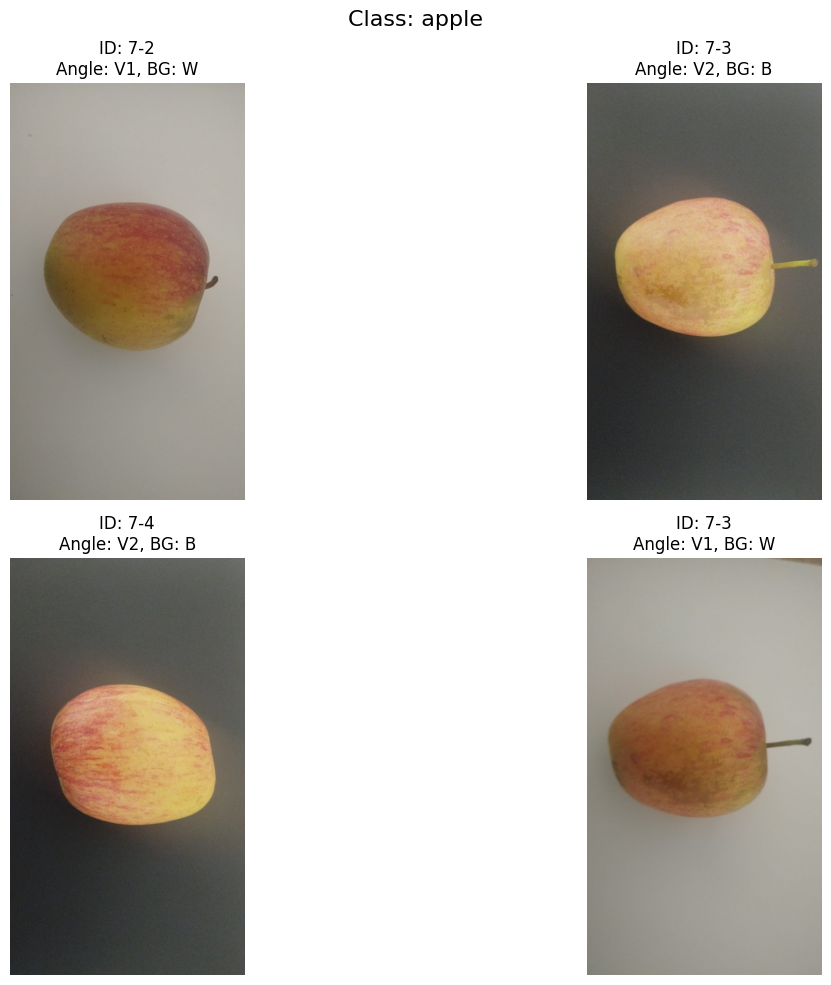

In [5]:
def show_images_by_class(class_name, n_images=4, figsize=(15, 10)):
    """
    Display sample images for a given class.
    
    Args:
        class_name (str): English name of the class (e.g., 'apple').
        n_images (int): Number of images to display.
        figsize (tuple): Figure size.
    """
    class_data = metadata[metadata['class_name_english'] == class_name]
    if class_data.empty:
        print(f"No images found for class: {class_name}")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    fig.suptitle(f"Class: {class_name}", fontsize=16)
    
    # Randomly select n_images
    samples = class_data.sample(min(n_images, len(class_data)))
    
    for idx, (_, row) in enumerate(samples.iterrows()):
        ax = axes[idx // 2, idx % 2]
        img = imread(row['file_path'])
        ax.imshow(img)
        ax.set_title(f"ID: {row['class_id']}-{row['img_sequence']}\nAngle: {row['view_angle']}, BG: {row['background']}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Test with apple
show_images_by_class("apple", n_images=4)
#show_images_by_class("pear", n_images=4)

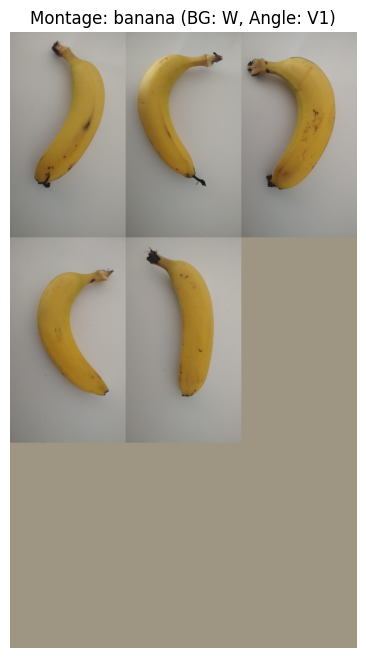


=== Metadata Summary ===
Total images: 200
Classes: ['banana' 'pear' 'poukan' 'morgote' 'persimmon' 'lemon' 'guava' 'apple'
 'orange' 'grape']


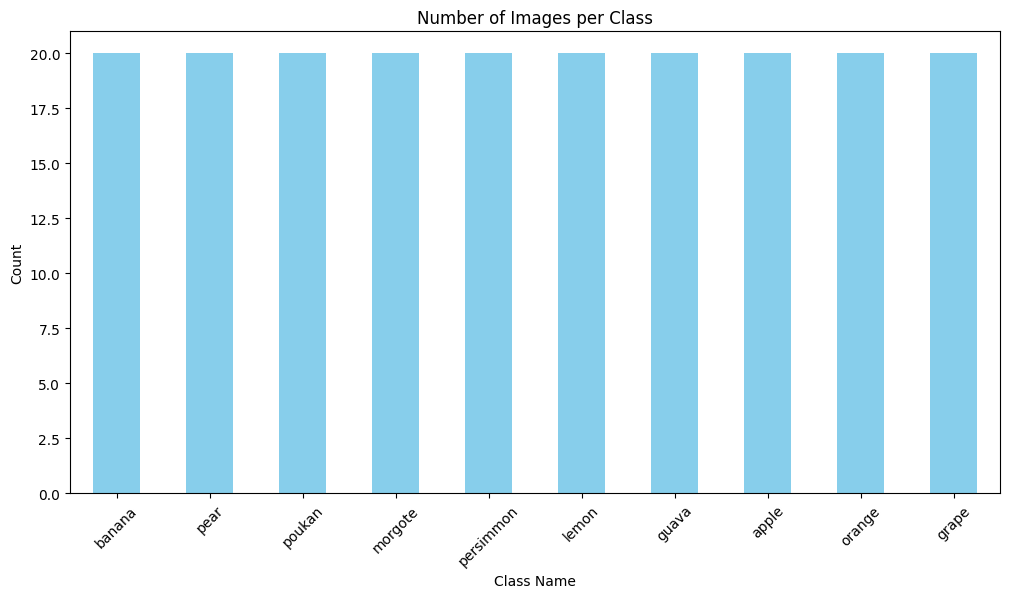

In [7]:
# ## 2. Fixed Montage Visualization

# %%
def create_montage(class_name, background='B', angle='V1', n_samples=5):
    """
    Create a montage of images for a class (updated for skimage 0.19+).
    """
    class_data = metadata[
        (metadata['class_name_english'] == class_name) &
        (metadata['background'] == background) &
        (metadata['view_angle'] == angle)
    ].head(n_samples)
    
    if class_data.empty:
        print(f"No images found for {class_name} (BG: {background}, Angle: {angle})")
        return
    
    images = [imread(path) for path in class_data['file_path']]
    
    # Convert to numpy array and handle channel dimension
    images_array = np.array(images)
    if images_array.ndim == 4:  # RGB images
        montage_img = montage(images_array, channel_axis=-1)
    else:  # Grayscale
        montage_img = montage(images_array)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(montage_img)
    plt.title(f"Montage: {class_name} (BG: {background}, Angle: {angle})")
    plt.axis('off')
    plt.show()

# Example montage - now working!
create_montage("banana", background='W', angle='V1')

# %% [markdown]
# ## 3. Metadata Analysis

# %%
# Summary stats
print("\n=== Metadata Summary ===")
print(f"Total images: {len(metadata)}")
print(f"Classes: {metadata['class_name_english'].unique()}")

# Plot class distribution
plt.figure(figsize=(12, 6))
metadata['class_name_english'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Number of Images per Class")
plt.xlabel("Class Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()